![imagen](https://cdn.foodbeast.com/content/wp-content/uploads/2012/03/beer-print-01-selectism.jpg)

# Ejercicio pandas estadística
Para este ejercicio se ha utilizado [un dataset de un concurso de kaggle](https://www.kaggle.com/nickhould/craft-cans), cuyo reto consiste en predecir el tipo de cerveza en función de sus características (nivel de alcohol, amargura, tamaño...).

# Ejercicio 1
Importa las librerias que consideres

In [93]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

## Ejercicio 2
1. Importa el dataset "datasets_beer.csv"
2. Imprime por pantalla los primeros registros.
3. ¿Cuáles son sus columnas?
4. ¿Qué dimensiones tiene el DataFrame?

In [9]:
beer = pd.read_csv("data/datasets_beers.csv")
beer.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [14]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   abv         2348 non-null   float64
 2   ibu         1405 non-null   float64
 3   id          2410 non-null   int64  
 4   name        2410 non-null   object 
 5   style       2405 non-null   object 
 6   brewery_id  2410 non-null   int64  
 7   ounces      2410 non-null   float64
dtypes: float64(3), int64(3), object(2)
memory usage: 150.8+ KB


In [11]:
beer.shape

(2410, 8)

## Ejercicio 3
[Elimina la columna "Unnamed: 0"](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html)

In [21]:
beer= beer.drop("Unnamed: 0", axis=1)
beer.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


## Ejercicio 4
¿Cuántas filas y columnas tiene el dataset?

In [22]:
beer.shape

(2410, 7)

## Ejercicio 5
¿De qué tipo son los datos?

In [24]:
beer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


## Ejercicio 6
Obtén en un nuevo DataFrame un resumen con las principales estadísticas de las columnas numéricas: mean, max, count, cuartiles...

In [25]:
beer_new=beer

In [27]:
beer_new.describe()

,abv,ibu,id,brewery_id,ounces
count,2348.000000,1405.000000,2410.000000,2410.000000,2410.000000
mean,0.059773,42.713167,1431.113278,231.749793,13.592241
std,0.013542,25.954066,752.459975,157.685604,2.352204
min,0.001000,4.000000,1.000000,0.000000,8.400000
25%,0.050000,21.000000,808.250000,93.000000,12.000000
50%,0.056000,35.000000,1453.500000,205.000000,12.000000
75%,0.067000,64.000000,2075.750000,366.000000,16.000000
max,0.128000,138.000000,2692.000000,557.000000,32.000000


## Ejercicio 7
¿Cuántas birras hay de cada estilo en este dataset? [Investiga en la documentación de Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html) si puedes hacer un conteo de valores.

In [ ]:
len(beer_new["style"].unique()) #hay 100 estilos

100

In [35]:
beer.groupby("style")["name"].count()

style
Abbey Single Ale                2
Altbier                        13
American Adjunct Lager         18
American Amber / Red Ale      133
American Amber / Red Lager     29
                             ... 
Tripel                         11
Vienna Lager                   20
Wheat Ale                       1
Winter Warmer                  15
Witbier                        51
Name: name, Length: 99, dtype: int64

## Ejercicio 8
1. Imprime por pantalla los registros desde el décimo hasta el vigésimo
2. De esos registros, imprime por pantalla desde la columna `name` a `ounces`, ambas incluidas
3. Quédate con las columnas `abv`, `ibu` y `ounces`, y además quédate sólo con los registros 10 al 20.
4. Convierte el resultado del apartado 3 en un array de `numpy`

In [43]:
beer_new.iloc[10:21]

,abv,ibu,id,name,style,brewery_id,ounces
10,0.072,NaN,2099,Sophomoric Saison,Saison / Farmhouse Ale,177,12.0
11,0.073,NaN,2098,Regional Ring Of Fire,Saison / Farmhouse Ale,177,12.0
12,0.069,NaN,2097,Garce Selé,Saison / Farmhouse Ale,177,12.0
13,0.085,NaN,1980,Troll Destroyer,Belgian IPA,177,12.0
14,0.061,60.0,1979,Bitter Bitch,American Pale Ale (APA),177,12.0
15,0.060,NaN,2318,Ginja Ninja,Cider,154,12.0
16,0.060,NaN,2170,Cherried Away,Cider,154,12.0
17,0.060,NaN,2169,Rhubarbarian,Cider,154,12.0
18,0.060,NaN,1502,BrightCider,Cider,154,12.0
19,0.082,NaN,1593,He Said Baltic-Style Porter,Baltic Porter,368,12.0


In [46]:
beer_new.loc[:, "name" : "ounces"]

,name,style,brewery_id,ounces
0,Pub Beer,American Pale Lager,408,12.0
1,Devil's Cup,American Pale Ale (APA),177,12.0
2,Rise of the Phoenix,American IPA,177,12.0
3,Sinister,American Double / Imperial IPA,177,12.0
4,Sex and Candy,American IPA,177,12.0
...,...,...,...,...
2405,Belgorado,Belgian IPA,424,12.0
2406,Rail Yard Ale,American Amber / Red Ale,424,12.0
2407,B3K Black Lager,Schwarzbier,424,12.0
2408,Silverback Pale Ale,American Pale Ale (APA),424,12.0


In [50]:
beer_new.loc[10:20, ["abv" , "ibu", "ounces"]]

,abv,ibu,ounces
10,0.072,NaN,12.0
11,0.073,NaN,12.0
12,0.069,NaN,12.0
13,0.085,NaN,12.0
14,0.061,60.0,12.0
15,0.060,NaN,12.0
16,0.060,NaN,12.0
17,0.060,NaN,12.0
18,0.060,NaN,12.0
19,0.082,NaN,12.0


In [55]:
array=beer_new.loc[10:20, ["abv" , "ibu", "ounces"]].to_numpy()
array

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

In [56]:
np.array(beer_new.loc[10:20, ["abv" , "ibu", "ounces"]])

array([[ 0.072,    nan, 12.   ],
       [ 0.073,    nan, 12.   ],
       [ 0.069,    nan, 12.   ],
       [ 0.085,    nan, 12.   ],
       [ 0.061, 60.   , 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.06 ,    nan, 12.   ],
       [ 0.082,    nan, 12.   ],
       [ 0.082,    nan, 12.   ]])

## Ejercicio 9
¿Cuántas onzas pesan todas las birras del dataset?

In [61]:
beer_peso_onzas=beer_new["ounces"].sum()
beer_peso_onzas

np.float64(32757.3)

## Ejercicio 10
El amargor de las cervezas se mide por su nivel de IBUs.
1. ¿Cuál es el amargor medio de las cervezas?
2. ¿El máximo? ¿Y el mínimo?
3. ¿Qué cerveza es la que tiene el amargor máximo? ¿Cuál es la de amargor mínimo?

In [ ]:
beer_amargor_media=beer_new["ibu"].mean()
beer_amargor_media.round(2)


np.float64(42.71)

In [80]:
beer_amargor_max=beer_new["ibu"].max()
beer_amargor_max.round(2)

np.float64(138.0)

In [86]:
beer_amargor_min=beer_new["ibu"].min()
beer_amargor_min.round(2)

np.float64(4.0)

In [ ]:

nombre_beer=beer_new["ibu"] == beer_amargor_max
beer_new[nombre_beer]

,abv,ibu,id,name,style,brewery_id,ounces
147,0.082,138.0,980,Bitter Bitch Imperial IPA,American Double / Imperial IPA,374,12.0


In [87]:
nombre_beer_min=beer_new["ibu"] == beer_amargor_min
beer_new[nombre_beer_min]

,abv,ibu,id,name,style,brewery_id,ounces
106,0.056,4.0,1350,Summer Solstice,Cream Ale,171,12.0
112,0.056,4.0,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
117,0.056,4.0,77,Summer Solstice (2011),Cream Ale,171,12.0


## Ejercicio 11
No queda muy claro cuánto de dispar, de dispersa, es la medida de IBU. Mediante estadística descriptiva (una o dos métricas, sin gráficas), razona la dispersión de la variable IBU.

In [91]:
beer_new["ibu"].describe()

count    1405.000000
mean       42.713167
std        25.954066
min         4.000000
25%        21.000000
50%        35.000000
75%        64.000000
max       138.000000
Name: ibu, dtype: float64

In [ ]:
#Son valores muy dispersos

## Ejercicio 12
¿Existe alguna relación lineal entre las variables numéricas del dataset? Intenta pintar este razonamiento mediante un gráfico

In [92]:
beer_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   abv         2348 non-null   float64
 1   ibu         1405 non-null   float64
 2   id          2410 non-null   int64  
 3   name        2410 non-null   object 
 4   style       2405 non-null   object 
 5   brewery_id  2410 non-null   int64  
 6   ounces      2410 non-null   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 131.9+ KB


In [95]:
beer_numerico= beer_new.loc[:, ["abv", "ibu", "id","brewery_id", "ounces" ]]
beer_numerico.head()

,abv,ibu,id,brewery_id,ounces
0,0.050,NaN,1436,408,12.0
1,0.066,NaN,2265,177,12.0
2,0.071,NaN,2264,177,12.0
3,0.090,NaN,2263,177,12.0
4,0.075,NaN,2262,177,12.0


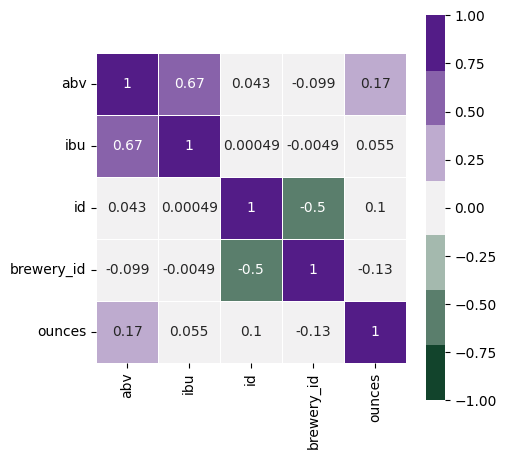

In [98]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.heatmap(beer_numerico.corr(),vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(145, 280, s=85, l=25, n=7),
            square=True, linewidths=.5, annot=True);

In [ ]:
# Existe correlación entre iby y abv

## Ejercicio 13
Representa el nivel de alcohol (columna `abv`) en un histograma. ¿Se trata de una distribución simétrica o asimétrica?

## Ejercicio 14
Representa mediante un *boxplot* de `seaborn` la variable `abv`

## Ejercicio 15
1. ¿Qué estilos son los que tienen en media más alcohol?
2. ¿Y los estilos que son en media más amargos?

## Ejercicio 16
Carga el datasets de cervecerias `datasets_breweries.csv`

## Ejercicio 17
1. Renombra la columna `Unnamed: 0` como `brewery_id`
2. Renombra también la columna `name` por `brewery_name`. ¿Puedes hacer ambos apartados en una sola sentencia?

## Ejercicio 18
Junta los dos datasets que tienes

## Ejercicio 19
1. ¿Cuántos estados diferentes hay?
2. ¿Y ciudades diferentes?
3. ¿Cuántas cervecerías hay?

## Ejercicio 20
Agrupa por estado y ciudad, la media, mediana y máximo nivel de alcohol

## Ejercicio 21
¿Cuáles son las cervezas más amargas que se consumen en Indiana, estado = `IN`?

## Ejercicio 22
Obtén una tabla con los principales estadísticos del campo `ibu`,  a nivel ciudad

## Ejercicio 23
Consigue en un DataFrame de todas las cervezas en cuyas cervecerías al menos haya una cerveza con un `abv` mínimo 0.07.

In [98]:
# todas las cervezas, que venda una cervecería, donde al menos una de ellas sea de 0.07 para arriba

## Ejercicio 24
Teniendo en cuenta la media de amargor de todas las cervezas, obtén una tabla con las cervezas cuyos estados tengan una media de amargor en cerveza por encima de la media

In [104]:
# Las cervezas que se encuentran en aquellos estados, cuya media de amargor, sea superior a la media de amargor total